In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def add_path_bi(g,a,b,subnet="father"):
    """ Take a graph g and creates a bidirectional edge from node a to node b """
    g.add_path([a,b],net=subnet)
    g.add_path([b,a],net=subnet)
    return
    

In [13]:

def create_lattice(ratio,N=4,M=4):
    """ This function returns a city graph
    that has two edge classes: father or mother. Father 
    refers to walking points, where mother to points connected with
    transport line."""
    
    city_graph = nx.DiGraph()
    for i1 in range(M+1):
        for i2 in range(N+1):
            city_graph.add_nodes_from([(i1,i2)])
            if (i1%ratio ==0)& (i2%ratio==0):
                if i2 !=M:
                    add_path_bi(city_graph,(i1,i2),(i1,i2+ratio),subnet="mother")
                if i1 !=0:
                    add_path_bi(city_graph,(i1,i2),(i1-ratio,i2), subnet="mother")
            if i2!=M:
                add_path_bi(city_graph, (i1,i2),(i1,i2+1),subnet="father")
            if i1!=0:
                add_path_bi(city_graph,(i1,i2),(i1-1,i2), subnet="father")
    return city_graph



In [14]:
city_graph = create_lattice(3,9,9)


In [17]:
madre = nx.DiGraph(((source, target, attr) for source, target, attr 
                    in city_graph.edges(data=True) if attr['net'] == "mother"))


In [18]:
madre.nodes

NodeView(((0, 0), (0, 3), (3, 0), (0, 6), (3, 3), (0, 9), (3, 6), (3, 9), (6, 0), (6, 3), (6, 6), (6, 9), (9, 0), (9, 3), (9, 6), (9, 9)))

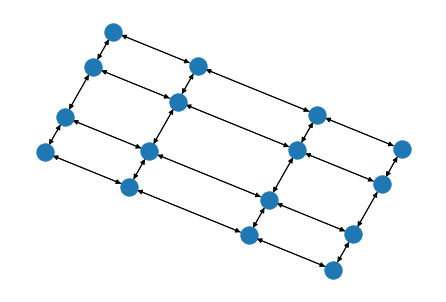

In [23]:
nx.draw_spectral(madre)

In [29]:
madre.edges(nbunch=[(3,3)])

OutEdgeDataView([((3, 3), (3, 0)), ((3, 3), (3, 6)), ((3, 3), (0, 3)), ((3, 3), (6, 3))])

In [31]:
current_node = (0,0)
list(madre.edges(nbunch=[current_node]))

[((0, 0), (0, 3)), ((0, 0), (3, 0))]

In [83]:
def random_closed_path(terminal_node):
    
    path=[]
    path_complete = False

    current_node = terminal_node
    c=0
    while not path_complete:
        next_node = random.choice(list(madre.neighbors(current_node)))
        if c==1:
            while next_node == terminal_node: #avoid one-length path
                next_node = random.choice(list(madre.neighbors(current_node)))
        path.append((current_node,next_node))    
        current_node = next_node
        c+=1
        if current_node == terminal_node:
           path_complete = True
    return path

In [84]:
path = random_closed_path((0,0))


In [92]:
path_graph = madre.edge_subgraph(path)

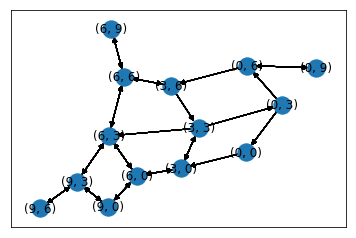

In [98]:
pos = nx.spring_layout(path_graph)
nx.draw_networkx_nodes(path_graph,pos=pos)
nx.draw_networkx_labels(path_graph,pos=pos)
colors = ['r', 'b', 'y']
for ctr, edgelist in enumerate(list(path_graph.edges)):
    nx.draw_networkx_edges(path_graph,pos=pos)